<a href="https://colab.research.google.com/github/anniechen0506/Modeling-and-Optimization-Fall-2023/blob/main/Office_Building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base Model that Prints Output


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#inputs

num_sim = 10000
total_sqft = np.random.normal(180000,180000*0.2,num_sim)
m = np.random.normal(0.05, 0.05*0.2,num_sim)
b = np.random.normal(1.5, 1.5*0.2, num_sim)
op_expense_per_sqft = np.random.normal(1.20, 1.20*0.2, num_sim)
heating_surcharge_per_sqft = np.random.normal(.2, 0.2*0.2, num_sim)
op_exp_annual_growth = np.random.normal(.12, .12*.2, num_sim)


annual_mortgage = 1500000
tax_rate = .34

price_per_sqft = [15, 15, 15, 15, 15]

num_years = 5

In [ ]:
#rev calc
perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
print("revenue: ", revenue)

revenue:  [array([4867094.40718459, 5889385.66484324, 6150157.54634943, ...,
       6734879.62849608, 7947961.64892818, 5991899.19004761]), array([4867094.40718459, 5889385.66484324, 6150157.54634943, ...,
       6734879.62849608, 7947961.64892818, 5991899.19004761]), array([4867094.40718459, 5889385.66484324, 6150157.54634943, ...,
       6734879.62849608, 7947961.64892818, 5991899.19004761]), array([4867094.40718459, 5889385.66484324, 6150157.54634943, ...,
       6734879.62849608, 7947961.64892818, 5991899.19004761]), array([4867094.40718459, 5889385.66484324, 6150157.54634943, ...,
       6734879.62849608, 7947961.64892818, 5991899.19004761])]


In [ ]:
for i in range(num_years):
  data = pd.DataFrame(zip(total_sqft, m, b, op_expense_per_sqft, heating_surcharge_per_sqft, op_exp_annual_growth, perc_occ[i], sqft_occ[i], revenue[i]),
                    columns = ['total_sqft', 'm', 'b', 'op_expense_per_sqft', 'heating_surcharge_per_sqft', 'op_exp_annual_growth', 'perc_occ', 'sqft_occ', 'revenue'])
data

,total_sqft,m,b,op_expense_per_sqft,heating_surcharge_per_sqft,op_exp_annual_growth,perc_occ,sqft_occ,revenue
0,236801.537145,0.042342,0.735100,1.132466,0.200439,0.141731,1.370232,324472.960479,4.867094e+06
1,177507.135140,0.041598,1.587914,1.359621,0.194882,0.092134,2.211887,392625.710990,5.889386e+06
2,169245.389202,0.050042,1.671946,0.615697,0.183899,0.171827,2.422580,410010.503090,6.150158e+06
3,176649.751831,0.053921,1.972530,1.063601,0.252232,0.111009,2.781349,491324.617051,7.369869e+06
4,194552.338602,0.057594,1.614647,1.648910,0.125692,0.123262,2.478557,482209.088503,7.233136e+06
...,...,...,...,...,...,...,...,...,...
9995,199982.501064,0.051396,1.133375,1.296094,0.210088,0.157249,1.904313,380829.192680,5.712438e+06
9996,187412.045959,0.042661,1.832995,1.411169,0.192923,0.079413,2.472914,463453.943163,6.951809e+06
9997,169394.054620,0.062832,1.708099,1.171562,0.189157,0.115874,2.650577,448991.975233,6.734880e+06
9998,191031.949714,0.050191,2.020828,1.422764,0.213831,0.084694,2.773694,529864.109929,7.947962e+06


In [ ]:
#linear regression
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(data[['total_sqft', 'm', 'b', 'op_expense_per_sqft', 'heating_surcharge_per_sqft', 'op_exp_annual_growth', 'revenue']])
y = data['revenue']

In [ ]:
mod = sm.OLS(y, X, hasconstant = True)
result = mod.fit()
result.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['hasconstant']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.624e+32
Date:                Sat, 04 Nov 2023   Prob (F-statistic):               0.00
Time:                        03:52:53   Log-Likelihood:             1.8312e+05
No. Observations:               10000   AIC:                        -3.662e+05
Df Residuals:                    9992   BIC:                        -3.662e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -6.636e-09   9.37e-10     -7.080      0.000   -8.47e-09    -4.8e-09
total_sqft                  2.309e-14   4.95e-15      4.664      0.000    1.34e-14    3.28e-14
m                           5.122e-08   6.47e-09      7.913      0.000    3.85e-08    6.39e-08
b                           3.783e-10   4.05e-10      0.933      0.351   -4.16e-10    1.17e-09
op_expense_per_sqft         3.347e-10   1.12e-10      2.985      0.003    1.15e-10    5.55e-10
heating_surcharge_per_sqft -2.387e-09    6.6e-10     -3.616      0.000   -3.68e-09   -1.09e-09
op_exp_annual_growth        7.567e-09   1.12e-09      6.785      0.000    5.38e-09    9.75e-09
revenue                        1.0000   1.46e-16   6.83e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       31.515   Durbin-Watson:                   0.163
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.879
Skew:                          -0.130   Prob(JB):                     1.20e-07
Kurtosis:                       3.093   Cond. No.                     1.52e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

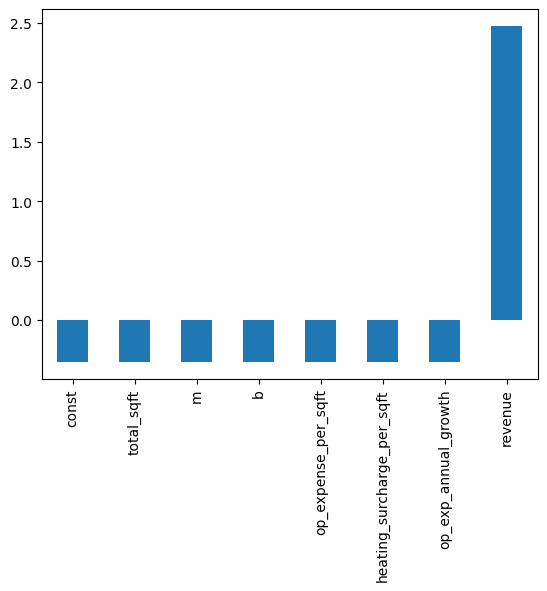

In [ ]:
#bar graph
normalized_coefficients = result.params * X.std()
normalized_coefficients = pd.Series(normalized_coefficients)
normalized_coefficients = (normalized_coefficients - normalized_coefficients.mean()) / normalized_coefficients.std()
normalized_coefficients.plot.bar()

In [ ]:
#operating expense calculations
base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
mortgage = [annual_mortgage for i in range(num_years)]
operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
print("operating costs:", operating_costs)

operating costs: [1748400.0, 1778208.0, 1811592.96, 1848984.1152000001, 1890862.2090240002]


In [ ]:
#before and after-tax earnings
ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
taxes = [ebt[i]*tax_rate for i in range(num_years)]
earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
print("earnings after tax: ", earnings_after_tax)

total_earnings_after_tax = sum(earnings_after_tax)
print("total earnings after tax: ", total_earnings_after_tax)

earnings after tax:  [182556.0, 162882.72, 140848.64640000003, 116170.48396799993, 88530.94204415986]
total earnings after tax:  690988.7924121597


#Model as Function



In [ ]:
def office_earnings(total_sqft = 180000,
           m = -0.05,
           b = 1.5,
           op_expense_per_sqft = 1.20,
           heating_surcharge_per_sqft = .2,
           op_exp_annual_growth = .12,
           annual_mortgage = 1500000,
           tax_rate = .34,
           price_per_sqft = [15, 15, 15, 15, 15],
           num_years = 5):
  #rev calc
  perc_occ = [m*price_per_sqft[i] + b for i in range(num_years)]
  sqft_occ = [perc_occ[i]*total_sqft for i in range(num_years)]
  revenue = [sqft_occ[i]*price_per_sqft[i] for i in range(num_years)]
  #operating expense calculations
  base_op_cost_as_percY1 = [(1+op_exp_annual_growth)**i for i in range(num_years)] #note that range(num_years) = range(5) = [0,1,2,3,4] and (1+op_exp_annual_growth)**0 = 1.
  base_op_cost = [op_expense_per_sqft*total_sqft*base_op_cost_as_percY1[i] for i in range(num_years)]
  heating_surcharge = [perc_occ[i]*base_op_cost[i]*heating_surcharge_per_sqft for i in range(num_years)]
  mortgage = [annual_mortgage for i in range(num_years)]
  operating_costs = [base_op_cost[i] + heating_surcharge[i] + mortgage[i] for i in range(num_years)]
  #before and after-tax earnings
  ebt = [revenue[i] - operating_costs[i] for i in range(num_years)]
  taxes = [ebt[i]*tax_rate for i in range(num_years)]
  earnings_after_tax = [ebt[i] - taxes[i] for i in range(num_years)]
  total_earnings_after_tax = sum(earnings_after_tax)
  return total_earnings_after_tax


In [ ]:
office_earnings()

690988.7924121597